<a href="https://colab.research.google.com/github/dbrody112/Mach_Learning_Remote_Sensing/blob/main/Visualization_of_Tubbs%2C_Nuns%2C_and_Pocket_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tubbs Bounding Box**

In [ ]:
!pip install rasterio
!pip install segmentation_models_pytorch
!pip install --upgrade plotly
!pip install plotly.express
!pip install albumentations==0.3.0
!pip install cartopy
!pip install folium==0.2.1
!pip install requests==2.23.0
!pip install osmnx
!pip install matplotlib==3.1.3
!apt-get update
!apt-get install libgdal-dev -y
!apt-get install python-gdal -y
!apt-get install python-numpy python-scipy -y
!pip install rioxarray
!pip install geemap
!pip install geojson
!pip install geopandas

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)
  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5/folium-0.2.1-cp37-none-any.whl
ERROR: geemap 0.8.15 has requirement folium>=0.11.0, but you'll have folium 0.2.1 which is incompatible.
  Found existing installation: folium 0.12.1
    Uninstalling folium-0.12.1:
      Successfully uninstalled folium-0.12.1


  Using cached https://files.pythonhosted.org/packages/1a/70/1935c770cb3be6e3a8b78ced23d7e0f3b187f5cbfab4749523ed65d7c9b1/requests-2.23.0-py2.py3-none-any.whl
ERROR: osmnx 1.1.0 has requirement matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: osmnx 1.1.0 has requirement requests>=2.25, but you'll have requests 2.23.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
ERROR: geemap 0.8.15 has requirement folium>=0.11.0, but you'll have folium 0.2.1 which is incompatible.
  Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


  Using cached https://files.pythonhosted.org/packages/24/33/5568d443ba438d95d4db635dd69958056f087e57e1026bee56f959d53f9d/matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/29/c1/24814557f1d22c56d50280771a17307e6bf87b70727d975fd6b2ce6b014a/requests-2.25.1-py2.py3-none-any.whl
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
ERROR: geemap 0.8.15 has requirement folium>=0.11.0, but you'll have folium 0.2.1 which is incompatible.
  Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


  Using cached https://files.pythonhosted.org/packages/4c/9b/35ab3469fd1509f7636a344940569ebfd33239673fd2318e80b4700a257c/matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: osmnx 1.1.0 has requirement matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: geemap 0.8.15 has requirement folium>=0.11.0, but you'll have folium 0.2.1 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad

In [ ]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.crs import CRS
import glob
import subprocess
import urllib, geojson,subprocess,gdal
import geopandas as gpd
import shapefile
import os
import ee
import json
import geemap
from rasterio.plot import show
import math
import osr
import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from osgeo import gdal
import pandas as pd
from random import shuffle
import sklearn.metrics as skmetrics
%tensorflow_version 2.x
import tensorflow as tf
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import albumentations as A
from albumentations.pytorch.transforms import ToTensor
import cv2
import segmentation_models_pytorch as smp
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.model_selection import KFold
from tqdm import tqdm
import shapely
import osmnx as ox
from shapely.geometry import box
import geopandas as gpd
from rasterio.warp import calculate_default_transform, reproject, Resampling
from PIL import Image
from datetime import datetime, timedelta
from pprint import *
import geemap.eefolium as geemap
import plotly_express as px
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

Authentication

In [ ]:
# Initializing google earth engine
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=XU1CfGvEFHLuCpk5y2iQK1whJQeY1UenqdWji3VM-Ck&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g50b971jcmu9hB-ID_Wq4Z4mEdBQpjjPmWBwOgrWT-GSzjHjHxDnok

Successfully saved authorization token.


In [ ]:
# Getting the fires info
!gdown https://drive.google.com/uc?id=1rMAKDm5r3Jz0rFYQ4Jf6IXNaLUIDjV2P
!unzip fire20_1.zip

Downloading...
From: https://drive.google.com/uc?id=1rMAKDm5r3Jz0rFYQ4Jf6IXNaLUIDjV2P
To: /content/fire20_1.zip
45.7MB [00:00, 145MB/s] 
Archive:  fire20_1.zip
  inflating: fire20_1.gdb/a00000001.gdbindexes  
  inflating: fire20_1.gdb/a00000001.gdbtable  
  inflating: fire20_1.gdb/a00000001.gdbtablx  
  inflating: fire20_1.gdb/a00000001.TablesByName.atx  
  inflating: fire20_1.gdb/a00000002.gdbtable  
  inflating: fire20_1.gdb/a00000002.gdbtablx  
  inflating: fire20_1.gdb/a00000003.gdbindexes  
  inflating: fire20_1.gdb/a00000003.gdbtable  
  inflating: fire20_1.gdb/a00000003.gdbtablx  
  inflating: fire20_1.gdb/a0000007e.CatItemsByPhysicalName.atx  
  inflating: fire20_1.gdb/a0000007e.CatItemsByType.atx  
  inflating: fire20_1.gdb/a0000007e.FDO_UUID.atx  
  inflating: fire20_1.gdb/a0000007e.freelist  
  inflating: fire20_1.gdb/a0000007e.gdbindexes  
  inflating: fire20_1.gdb/a0000007e.gdbtable  
  inflating: fire20_1.gdb/a0000007e.gdbtablx  
  inflating: fire20_1.gdb/a0000007e.horizo

In [ ]:
df = gpd.read_file("./fire20_1.gdb")
df = df.to_crs(4326)  #converting geodataframe to WGS84
df.head()             #showing the first 5 fires

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,,110.0,109.602501,1.0,1.0,None,3252.523280,4.435447e+05,"MULTIPOLYGON (((-121.34840 38.88999, -121.3483..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,,670.0,685.585022,1.0,1.0,None,9653.760308,2.774464e+06,"MULTIPOLYGON (((-121.35275 38.82038, -121.3526..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-03-01T00:00:00+00:00,14.0,,26.0,27.300480,1.0,1.0,None,1649.643235,1.104811e+05,"MULTIPOLYGON (((-121.33333 38.84558, -121.3331..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,,13.0,12.931550,1.0,1.0,None,1577.155857,5.233211e+04,"MULTIPOLYGON (((-121.27317 38.96308, -121.2730..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,,10.3,10.315960,1.0,1.0,None,1035.787625,4.174722e+04,"MULTIPOLYGON (((-121.30065 39.48714, -121.3004..."


In [ ]:
#Visualization of Tubbs, Nuns, Pocket Fire Row
tubbs_fire = df[df["FIRE_NAME"] == "TUBBS"]
nuns_fire = df[df["FIRE_NAME"] == "NUNS"]
pocket_fire = df[df["FIRE_NAME"] == "POCKET"][df["YEAR_"] == "2017"]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [ ]:
# Converting the dates to date format for easy access
df['ALARM_DATE'] = df["ALARM_DATE"].dropna().apply(lambda x: datetime.strptime(x.split('+')[0],"%Y-%m-%dT%H:%M:%S"))
df['CONT_DATE'] = df["CONT_DATE"].dropna().apply(lambda x: datetime.strptime(x.split('+')[0],"%Y-%m-%dT%H:%M:%S"))

In [ ]:
# Function that returns fire dates and duration
def returnDuration(fire_name):
  start_date = np.array(df[df['FIRE_NAME'] == fire_name]['ALARM_DATE'])[0]
  print(start_date)
  end_date = np.array(df[df['FIRE_NAME'] == fire_name]['CONT_DATE'])[0]
  before_start_date = start_date - timedelta(days = 30)
  after_end_date = end_date + timedelta(days = 30)
  duration = end_date - start_date
  return before_start_date, start_date, end_date, after_end_date, duration.days
  
# Cloud mask function
def maskL8sr(image):
  cloudShadowBitMask = (1 << 3);
  cloudsBitMask = (1 << 5);
  qa = image.select('pixel_qa');
  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(qa.bitwiseAnd(cloudsBitMask).eq(0));
  return image.updateMask(mask)

# Function that creates true bounding box in earth engine
def returnBoundingBox(bounds,src_crs):
  bounding_box= ee.Geometry.BBox(bounds[0],bounds[1],bounds[2],bounds[3]).transform(src_crs,1)
  return bounding_box

# Date to string function
date_to_string = lambda x: datetime.strftime(x,"%Y-%m-%d")

# Specifying the area
# https://github.com/michalsen/states_geojson/blob/master/states/California
src_crs = 'EPSG:4326'
box = ee.Geometry({"type":"Polygon","coordinates":[[[-123.233256,42.006186],[-122.378853,42.011663],[-121.037003,41.995232],[-120.001861,41.995232],[-119.996384,40.264519],[-120.001861,38.999346],[-118.71478,38.101128],[-117.498899,37.21934],[-116.540435,36.501861],[-115.85034,35.970598],[-114.634459,35.00118],[-114.634459,34.87521],[-114.470151,34.710902],[-114.333228,34.448009],[-114.136058,34.305608],[-114.256551,34.174162],[-114.415382,34.108438],[-114.535874,33.933176],[-114.497536,33.697668],[-114.524921,33.54979],[-114.727567,33.40739],[-114.661844,33.034958],[-114.524921,33.029481],[-114.470151,32.843265],[-114.524921,32.755634],[-114.72209,32.717295],[-116.04751,32.624187],[-117.126467,32.536556],[-117.24696,32.668003],[-117.252437,32.876127],[-117.329114,33.122589],[-117.471515,33.297851],[-117.7837,33.538836],[-118.183517,33.763391],[-118.260194,33.703145],[-118.413548,33.741483],[-118.391641,33.840068],[-118.566903,34.042715],[-118.802411,33.998899],[-119.218659,34.146777],[-119.278905,34.26727],[-119.558229,34.415147],[-119.875891,34.40967],[-120.138784,34.475393],[-120.472878,34.448009],[-120.64814,34.579455],[-120.609801,34.858779],[-120.670048,34.902595],[-120.631709,35.099764],[-120.894602,35.247642],[-120.905556,35.450289],[-121.004141,35.461243],[-121.168449,35.636505],[-121.283465,35.674843],[-121.332757,35.784382],[-121.716143,36.195153],[-121.896882,36.315645],[-121.935221,36.638785],[-121.858544,36.6114],[-121.787344,36.803093],[-121.929744,36.978355],[-122.105006,36.956447],[-122.335038,37.115279],[-122.417192,37.241248],[-122.400761,37.361741],[-122.515777,37.520572],[-122.515777,37.783465],[-122.329561,37.783465],[-122.406238,38.15042],[-122.488392,38.112082],[-122.504823,37.931343],[-122.701993,37.893004],[-122.937501,38.029928],[-122.97584,38.265436],[-123.129194,38.451652],[-123.331841,38.566668],[-123.44138,38.698114],[-123.737134,38.95553],[-123.687842,39.032208],[-123.824765,39.366301],[-123.764519,39.552517],[-123.85215,39.831841],[-124.109566,40.105688],[-124.361506,40.259042],[-124.410798,40.439781],[-124.158859,40.877937],[-124.109566,41.025814],[-124.158859,41.14083],[-124.065751,41.442061],[-124.147905,41.715908],[-124.257444,41.781632],[-124.213628,42.000709],[-123.233256,42.006186]]]})
lat, lon = 38.60895, -122.62879
point = ee.Geometry.Point(lon, lat)

# Specifying dates of fire
before_start_datetime, start_datetime, end_datetime, after_end_datetime,duration = returnDuration("TUBBS")

#using landsat 8 and filtering by date and area
ds_name = "LANDSAT/LC08/C01/T1_SR"

before = ee.ImageCollection(ds_name)
before = before.filterDate(date_to_string(before_start_datetime), date_to_string(start_datetime - timedelta(days = 1))).filterBounds(point).map(maskL8sr)
during = ee.ImageCollection(ds_name)
during = during.filterDate(date_to_string(start_datetime), date_to_string(end_datetime)).filterBounds(point).map(maskL8sr)
after = ee.ImageCollection(ds_name)
after = after.filterDate(date_to_string(end_datetime + timedelta(days=1)), date_to_string(after_end_datetime)).filterBounds(point).map(maskL8sr)

#using modis land cover and filtering by date and area
land_cover = ee.ImageCollection("MODIS/006/MOD44B")
land_cover = land_cover.filterBounds(point)

#looking at cloud cover w/ file names for files in landsat 8
system_idxs = before.aggregate_array('system:index').getInfo()
cloud_pcts = before.aggregate_array('CLOUDY_PIXEL_PERCENTAGE').getInfo()
cloud_pcts

2017-10-08 00:00:00


[]

In [ ]:
#modis nir and swir
nir = 'B5'
swir = 'B7'
quality_band = 'pixel_qa'

# Specifying bounds from fire geometry column
tubbs_geom = tubbs_fire['geometry']
nuns_geom = nuns_fire['geometry']
pocket_geom = pocket_fire['geometry']

tubbs_bounds = np.array(tubbs_geom.bounds)[0]
nuns_bounds = np.array(nuns_geom.bounds )[0]
pocket_bounds = np.array(pocket_geom.bounds)[0]

# Creating the boundaries
true_tubbs_bounding_box = returnBoundingBox(tubbs_bounds,src_crs)
true_nuns_bounding_box = returnBoundingBox(nuns_bounds,src_crs)
true_pocket_bounding_box = returnBoundingBox(pocket_bounds,src_crs)

major_fires = pd.DataFrame({'name': ["TUBBS","NUNS","POCKET"], 'bounding_box': [true_tubbs_bounding_box, true_nuns_bounding_box,true_pocket_bounding_box]})

#before
before_ic = before.qualityMosaic(quality_band).clip(box)
nbr_before = before_ic.normalizedDifference([nir, swir]).rename('NBR')

#during
during_ic = during.qualityMosaic(quality_band).clip(box)
nbr_during = during_ic.normalizedDifference([nir, swir]).rename('NBR')

#after
after_ic = after.qualityMosaic(quality_band).clip(box)
nbr_after = after_ic.normalizedDifference([nir, swir]).rename('NBR')

dNBR = nbr_before.subtract(nbr_after)

In [ ]:
# Tailoring visualizations
nbr_vis = {
    'min': 0,
    'max': 1,
    'bands': ['NBR'],
    'palette': ['black','orange','red']
}

geology_vis = {
    'min': 0,
    'max': 3000,
    'bands' : ['B7','B6','B2'] #swir2, swir1, blue
    
}

false_color_vis = {
    'min': 0,
    'max': 3000,
    'bands': ['B6', 'B5', 'B4'] #swir1,nir,red
}

true_color_vis = {
    'min': 0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'] # red, green,blue
}

swir_vis = {
     'min': 0,
    'max': 3000,
    'bands' : ['B6','B5','B3']
    
}

nir_vis = {
    'min': 0,
    'max': 3000,
    'bands' : ['B5','B4','B3']
    
}

In [ ]:
# Initializing the map 
Map1 = geemap.Map(center=(lat, lon), zoom=11)

# Adding layers to map. think about adding a legend
for fire in range(len(major_fires)):
  box = major_fires['bounding_box'][fire]
  fire_name = major_fires['name'][fire]

  before_ic = before.qualityMosaic(quality_band).clip(box)
  nbr_before = before_ic.normalizedDifference([nir, swir]).rename('NBR')

  after_ic = after.qualityMosaic(quality_band).clip(box)
  nbr_after = after_ic.normalizedDifference([nir, swir]).rename('NBR')
  
  Map1.addLayer(before_ic, false_color_vis, fire_name+' before_false_color')
  Map1.addLayer(before_ic,true_color_vis, fire_name+' true_color_before')
  Map1.addLayer(before_ic, nir_vis, fire_name+ ' nir_before')
  Map1.addLayer(nbr_before, nbr_vis, fire_name+' nbr_before')

  Map1.addLayer(after_ic, false_color_vis, fire_name+' after_false_color')
  Map1.addLayer(after_ic,true_color_vis, fire_name+' true_color_after')
  Map1.addLayer(after_ic, swir_vis, fire_name +' nir_after')
  Map1.addLayer(nbr_after, nbr_vis, fire_name + ' nbr_after')

Map1.addLayer(dNBR, nbr_vis, "dNBR")

In [ ]:
Map1

In [ ]:
# Initializing the histogram
hist = dNBR.reduceRegion(reducer=ee.Reducer.histogram(),
                                     geometry= box,
                                     scale=100,
                                     bestEffort=True)
bins, counts = hist.getInfo()['NBR']['bucketMeans'], hist.getInfo()['NBR']['histogram']

In [ ]:
# Thresholding the severity of the burnt area
# https://www.earthdatascience.org/courses/earth-analytics/multispectral-remote-sensing-modis/calculate-dNBR-R-Landsat/
df = pd.DataFrame()
df["SEVERITY LEVEL"] = ["Enhanced Regrowth", "Unburned", "Low Severity", "Moderate Severity", "High Severity"]
df["dNBR_range"] = [">-1.", "-.1 to .1", ".1 to .27", ".27 to .66", ".66<"]
df

,SEVERITY LEVEL,dNBR_range
0,Enhanced Regrowth,>-1.
1,Unburned,-.1 to .1
2,Low Severity,.1 to .27
3,Moderate Severity,.27 to .66
4,High Severity,.66<


Text(0.5, 1.0, 'dNBR Threshold Histogram')

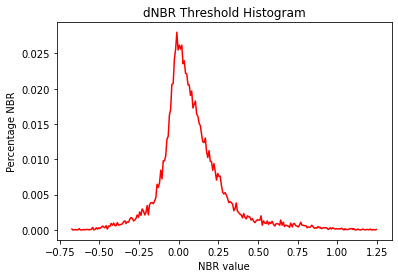

In [ ]:
# Percentage NBR histogram
plt.plot(bins, counts/np.sum(counts), 'r-')
plt.ylabel('Percentage NBR')
plt.xlabel('NBR value')
plt.title('dNBR Threshold Histogram')

In [ ]:
damage_threshold = 0.1
major_damage_threshold = 0.5
damage_dNBR_mask = dNBR.gt(damage_threshold)
major_damage_dNBR_mask = dNBR.gt(major_damage_threshold)

In [ ]:
# Initializing Map2
Map2 = geemap.Map(center=(lat, lon), zoom=11)

# Initializing the masks
before_ic = before.qualityMosaic(quality_band)
nbr_before = before_ic.normalizedDifference([nir, swir]).rename('NBR')
after_ic = after.qualityMosaic(quality_band)
nbr_after = after_ic.normalizedDifference([nir, swir]).rename('NBR')

area_arr = []
dnbr_arr = []
false_color_arr = []
nir_arr = []

for fire in range(len(major_fires)):
  box = major_fires['bounding_box'][fire]
  fire_name = major_fires['name'][fire]
  dNBR_true = dNBR.clip(box)
  Map2.addLayer(before_ic.mask(damage_dNBR_mask).clip(box), false_color_vis, fire_name+' before_false_color')
  Map2.addLayer(before_ic.mask(damage_dNBR_mask).clip(box),true_color_vis, fire_name+' true_color_before')
  Map2.addLayer(before_ic.mask(damage_dNBR_mask).clip(box), nir_vis, fire_name+ ' nir_before')
  Map2.addLayer(after_ic.mask(damage_dNBR_mask).clip(box), false_color_vis, fire_name+' after_false_color')
  Map2.addLayer(after_ic.mask(damage_dNBR_mask).clip(box),true_color_vis, fire_name+' true_color_after')
  Map2.addLayer(after_ic.mask(damage_dNBR_mask).clip(box), nir_vis, fire_name +' nir_after')
  Map2.addLayer(dNBR.clip(box).mask(dNBR.clip(box).gt(damage_threshold)), nbr_vis, fire_name + " dNBR")
  false_color_arr.append(after_ic.mask(damage_dNBR_mask).clip(box).select(['B6', 'B5', 'B4']))
  nir_arr.append(after_ic.mask(damage_dNBR_mask).clip(box).select(['B5', 'B4', 'B3']))
  dnbr_arr.append(dNBR.clip(box).mask(dNBR.clip(box).gt(damage_threshold)).select('NBR'))
  area_arr.append(dNBR.pixelArea().clip(box).mask(dNBR.clip(box).gt(damage_threshold)))

In [ ]:
Map2

In [ ]:
# Initializing Map3
Map3 = geemap.Map(center=(lat, lon), zoom=11)

# Adding the layers
for fire in range(len(major_fires)):
  box = major_fires['bounding_box'][fire]
  fire_name = major_fires['name'][fire]
  dNBR_true = dNBR.clip(box)
  Map3.addLayer(before_ic.mask(major_damage_dNBR_mask).clip(box), false_color_vis, fire_name+' before_false_color')
  Map3.addLayer(before_ic.mask(major_damage_dNBR_mask).clip(box),true_color_vis, fire_name+' true_color_before')
  Map3.addLayer(before_ic.mask(major_damage_dNBR_mask).clip(box), nir_vis, fire_name+ ' nir_before')
  Map3.addLayer(after_ic.mask(major_damage_dNBR_mask).clip(box), false_color_vis, fire_name+' after_false_color')
  Map3.addLayer(after_ic.mask(major_damage_dNBR_mask).clip(box),true_color_vis, fire_name+' true_color_after')
  Map3.addLayer(after_ic.mask(major_damage_dNBR_mask).clip(box), nir_vis, fire_name +' nir_after')
  Map3.addLayer(dNBR.clip(box).mask(dNBR.clip(box).gt(major_damage_threshold)), nbr_vis, fire_name + " dNBR")

In [ ]:
Map3

<h2>Threshold Reasoning</h2>

We had originally chosen 0.05 as the threshold of dNBR for all area burned and 0.5 for severe damage because. For the area burned, the percent error was at its lowest at that threshold, 22.56%. For the severe damage, the false color images for before and after showed large constrast. We eventually however found a public table indicating severity of the fire based on dNBR value. Based on the table we changed our thresholds to 0.1 and 0.66 for area burned and severe damage respectfully. These values held up with our histogram and in using these values we were able to eliminate some of the gasses in the severe damage images. Additionally, we were able to show that our percentages were more consistent with a lower standard deviation of 7.37 vs. 25.50, but unfortunately, our percent error increased to 25.20%. To make sure that no gasses were found in the severe damage image we used a threshold of 0.8 and confirmed it against the map above. Overall, for the sake of consistency, we chose the public values for overall area burned and 0.80 as the threshold for severe damage burned.

In [ ]:
nuns_fire

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry
20209,2017,CA,CDF,LNU,NUNS,00010049,2017-10-08T00:00:00+00:00,2017-10-31T00:00:00+00:00,14.0,"Nuns,Partrick, Adobe, Norrbom and Pressley>Nuns",55797.0,55798.191406,3.0,1.0,None,239290.593084,2.258073e+08,"MULTIPOLYGON (((-122.58171 38.46911, -122.5816..."


In [ ]:
ds_area = []
fires = [tubbs_fire, nuns_fire, pocket_fire]
for i in range(len(major_fires)):
  img = area_arr[i]
  area2 = img.reduceRegion(reducer = ee.Reducer.sum(),geometry = major_fires['bounding_box'][i], crs =  'EPSG:4326', scale = 100)
  area = ee.Number(area2.get('area')).getInfo()
  acres = area*0.0002471
  ds_area.append([major_fires['name'][i],area, acres,np.array(fires[i]['GIS_ACRES'])[0]])

In [ ]:
ds_area = np.array(ds_area)
area_df = pd.DataFrame({'fire_name':ds_area[:,0]})
area_df['estimated area burned (m^2)'] = ds_area[:,1]
area_df['estimated area burned (acres)'] = ds_area[:,2]
area_df['true area burned (acres)'] = ds_area[:,3]

area_df['estimated area burned (acres)'] = area_df['estimated area burned (acres)'].astype('float64')
area_df['true area burned (acres)'] = area_df['true area burned (acres)'].astype('float64')
area_df['estimated area burned (m^2)'] = area_df['estimated area burned (m^2)'].astype('float64')

area_df['percent_error (%)'] = np.abs((area_df['estimated area burned (acres)'].astype('float64') - area_df['true area burned (acres)'])/ area_df['true area burned (acres)'])*100

In [ ]:
area_df

,fire_name,estimated area burned (m^2),estimated area burned (acres),true area burned (acres),percent_error (%)
0,TUBBS,1.264274e+08,31240.208609,36701.984375,14.881418
1,NUNS,2.920997e+08,72177.830122,55798.191406,29.355143
2,POCKET,4.812732e+07,11892.261828,17359.328125,31.493536


In [ ]:
# Average percent error
average_percent_error = np.mean(area_df['percent_error (%)'])
print('average percent error:', average_percent_error)

# Standard deviation
std_dev = np.std(area_df['percent_error (%)'])
print('standard deviation:', std_dev)

average percent error: 25.243365705244788
standard deviation: 7.378827799177691


In [ ]:
# Burnt severity visualizations
nbr_high_severity_vis = {
    'min': 0,
    'max': 1,
    'bands': ['NBR'],
    'palette': ['red']
}

nbr_moderate_severity_vis = {
    'min':0,
    'max': 1,
    'bands': ['NBR'],
    'palette': ['orange']
}

nbr_small_severity_vis = {
    'min': 0,
    'max' : 1,
    'bands': ['NBR'],
    'palette': ['yellow']
}

nbr_unburned_vis = {
    'min': 0,
    'max' : 1,
    'bands': ['NBR'],
    'palette': ['#BFF4BE']
}

nbr_enhanced_regrowth_vis = {
    'min' : 0,
    'max' : 1,
    'bands': ['NBR'],
    'palette': ['green']
}

In [ ]:
# Initializing Map4
Map4 = geemap.Map(center=(lat, lon), zoom=11)

# Initializing the severity masks
high_severity_mask = dNBR.gt(major_damage_threshold)
moderate_severity_mask = dNBR.gt(0.27).bitwiseAnd(dNBR.lt(major_damage_threshold))
low_severity_mask = dNBR.gt(0.1).bitwiseAnd(dNBR.lt(.27))
unburned_mask = dNBR.gt(-0.1).bitwiseAnd(dNBR.lt(.1))
enhanced_growth_mask = dNBR.gt(-1).bitwiseAnd(dNBR.lt(-.1))

fc = ee.FeatureCollection([ee.Feature(major_fires['bounding_box'][0], {'name' : major_fires['name'][0], 'shown' : 'true'})])
minimum_dnbr = dNBR.getInfo()["bands"][0]["data_type"]["min"]
background = dNBR
fc = ee.FeatureCollection([ee.Feature(major_fires['bounding_box'][0], {'name' : major_fires['name'][0], 'shown' : 'true'}), ee.Feature(major_fires['bounding_box'][1], {'name' : major_fires['name'][1], 'shown' : 'true'}),ee.Feature(major_fires['bounding_box'][2], {'name' : major_fires['name'][2], 'shown' : 'true'})])

# Adding the severity layers
for fire in range(len(major_fires)):
  box = major_fires['bounding_box'][fire]
  fire_name = major_fires['name'][fire]
  Map4.addLayer(dNBR.mask(high_severity_mask), nbr_high_severity_vis, fire_name + " dnbr - high severity")
  Map4.addLayer(dNBR.mask(moderate_severity_mask), nbr_moderate_severity_vis, fire_name + " dnbr - moderate severity")
  Map4.addLayer(dNBR.mask(low_severity_mask), nbr_small_severity_vis, fire_name + " dnbr - small severity")
  Map4.addLayer(dNBR.mask(unburned_mask), nbr_unburned_vis, fire_name + " dnbr - unburned")
  Map4.addLayer(dNBR.mask(enhanced_growth_mask), nbr_enhanced_regrowth_vis, fire_name + " dnbr - enhanced regrowth")
Map4.add_legend(title = "SEVERITY", legend_dict= {"HIGH SEVERITY":"ff0000", "MODERATE SEVERITY":"ffa500", "LOW SEVERITY":"FFFF00", "UNBURNED":'BFF4BE', "ENHANCED GROWTH" : "154734"})
Map4.addLayer(fc, {'color' : 'grey', 'opacity' :1},"fire_name")

In [ ]:
Map4

In [ ]:
# Area Burned (A)
area_df

,fire_name,estimated area burned (m^2),estimated area burned (acres),true area burned (acres),percent_error (%)
0,TUBBS,1.264274e+08,31240.208609,36701.984375,14.881418
1,NUNS,2.920997e+08,72177.830122,55798.191406,29.355143
2,POCKET,4.812732e+07,11892.261828,17359.328125,31.493536


In [ ]:
average_percent_error = np.mean(area_df['percent_error (%)'])
print('average percent error:', average_percent_error)

average percent error: 25.243365705244788


In [ ]:
collectionFromImages = ee.ImageCollection.fromImages(dnbr_arr)
false_color_collection = ee.ImageCollection.fromImages(false_color_arr)

mosaic = collectionFromImages.mosaic()
false_color_mosaic = false_color_collection.mosaic()

In [ ]:
sonoma_county_bounding_box = ee.Geometry.BBox(-123.5329040498797042,38.1124623604872710,-122.3502189736890671,38.8527771269163651)

In [ ]:
Map4 = geemap.Map(center=(lat, lon), zoom=11)

In [ ]:
Map4.addLayer(mosaic, nbr_vis, "burn scars")
Map4.addLayer(false_color_mosaic, false_color_vis, "false color")
Map4.addLayer(dNBR.clip(sonoma_county_bounding_box), nbr_vis, "dnbr over sonoma")

In [ ]:
#for each fire try to get the bounding box, the small damage mask, and the large damage mask for dnbr. also try to get dnbr over all of sonoma 

Map4

In [ ]:
dnbr_export = mosaic.visualize(bands = ['NBR'],min = 0, max = 1, palette = ['black','orange','red'])
false_color_export = false_color_mosaic.visualize(bands = ['B6', 'B5', 'B4'],min = 0, max = 3000)
cali_box = ee.Geometry({"type":"Polygon","coordinates":[[[-123.233256,42.006186],[-122.378853,42.011663],[-121.037003,41.995232],[-120.001861,41.995232],[-119.996384,40.264519],[-120.001861,38.999346],[-118.71478,38.101128],[-117.498899,37.21934],[-116.540435,36.501861],[-115.85034,35.970598],[-114.634459,35.00118],[-114.634459,34.87521],[-114.470151,34.710902],[-114.333228,34.448009],[-114.136058,34.305608],[-114.256551,34.174162],[-114.415382,34.108438],[-114.535874,33.933176],[-114.497536,33.697668],[-114.524921,33.54979],[-114.727567,33.40739],[-114.661844,33.034958],[-114.524921,33.029481],[-114.470151,32.843265],[-114.524921,32.755634],[-114.72209,32.717295],[-116.04751,32.624187],[-117.126467,32.536556],[-117.24696,32.668003],[-117.252437,32.876127],[-117.329114,33.122589],[-117.471515,33.297851],[-117.7837,33.538836],[-118.183517,33.763391],[-118.260194,33.703145],[-118.413548,33.741483],[-118.391641,33.840068],[-118.566903,34.042715],[-118.802411,33.998899],[-119.218659,34.146777],[-119.278905,34.26727],[-119.558229,34.415147],[-119.875891,34.40967],[-120.138784,34.475393],[-120.472878,34.448009],[-120.64814,34.579455],[-120.609801,34.858779],[-120.670048,34.902595],[-120.631709,35.099764],[-120.894602,35.247642],[-120.905556,35.450289],[-121.004141,35.461243],[-121.168449,35.636505],[-121.283465,35.674843],[-121.332757,35.784382],[-121.716143,36.195153],[-121.896882,36.315645],[-121.935221,36.638785],[-121.858544,36.6114],[-121.787344,36.803093],[-121.929744,36.978355],[-122.105006,36.956447],[-122.335038,37.115279],[-122.417192,37.241248],[-122.400761,37.361741],[-122.515777,37.520572],[-122.515777,37.783465],[-122.329561,37.783465],[-122.406238,38.15042],[-122.488392,38.112082],[-122.504823,37.931343],[-122.701993,37.893004],[-122.937501,38.029928],[-122.97584,38.265436],[-123.129194,38.451652],[-123.331841,38.566668],[-123.44138,38.698114],[-123.737134,38.95553],[-123.687842,39.032208],[-123.824765,39.366301],[-123.764519,39.552517],[-123.85215,39.831841],[-124.109566,40.105688],[-124.361506,40.259042],[-124.410798,40.439781],[-124.158859,40.877937],[-124.109566,41.025814],[-124.158859,41.14083],[-124.065751,41.442061],[-124.147905,41.715908],[-124.257444,41.781632],[-124.213628,42.000709],[-123.233256,42.006186]]]}
)

In [ ]:
geemap.ee_export_image_to_drive(dnbr_export, description='landsat_dnbr_wgs84', folder='gee_data', region=box, scale=30,file_format="GeoTIFF")

Exporting landsat_dnbr_wgs84 ...


In [ ]:
geemap.ee_export_image_to_drive(false_color_export, description='landsat_false_color_wgs84_sonoma_2', folder='gee_data', region=ee.Geometry.Point(38.5251824, -122.9261095), scale=30,file_format="GeoTIFF")

Exporting landsat_false_color_wgs84_sonoma_2 ...


In [ ]:
# creating burn scar masks for each major fire. I recommend using the damage_mask for each as opposed to tge major_damage_ask because the
# damage_mask is more accurate in terms of acres burned.

major_damage_tubbs_mask = after_ic.mask(major_damage_dNBR_mask).clip(major_fires['bounding_box'][0])
damage_tubbs_mask = after_ic.mask(damage_dNBR_mask).clip(major_fires['bounding_box'][0])

major_damage_nuns_mask = after_ic.mask(major_damage_dNBR_mask).clip(major_fires['bounding_box'][1])
damage_nuns_mask = after_ic.mask(damage_dNBR_mask).clip(major_fires['bounding_box'][1])

major_damage_pocket_mask = after_ic.mask(major_damage_dNBR_mask).clip(major_fires['bounding_box'][2])
damage_pocket_mask = after_ic.mask(damage_dNBR_mask).clip(major_fires['bounding_box'][2])


# **NLCD Vegetation**

In [ ]:
# Specifying some variables
crs = 'EPSG:4326'
lat, lon = 38.60895, -122.62879
coordinate = ee.Geometry.Point(lon, lat)
bound = ee.Geometry.BBox(-124.409591,	32.534156, -114.131211, 42.009518).transform(crs, 1)
start_datetime = '2016-01-01'
end_datetime = '2016-12-31'

# Define image collection
nlcd2016 = ee.ImageCollection("USGS/NLCD_RELEASES/2016_REL")
nlcd2016 = nlcd2016.filterDate(start_datetime, end_datetime).filterBounds(coordinate)
nlcd2016.size().getInfo()

# Get the size of the collection
count = nlcd2016.size()
print('Count: ', str(count.getInfo())+'\n')

# Get the date range of images in the collection.
date_range = nlcd2016.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])
print('Date range: ', str(ee.Date(date_range.get('min')).getInfo()), str(ee.Date(date_range.get('max')).getInfo())+'\n')

# Get statistics for a property of the images in the collection.
sunStats = nlcd2016.aggregate_stats('SUN_ELEVATION')
pprint('Sun elevation statistics: '+str(sunStats.getInfo())+'\n')

# Sort by a cloud cover property, get the least cloudy image.
image = ee.Image(nlcd2016.sort('CLOUD_COVER').first())
print('Least cloudy image: ', str(image.getInfo())+'\n')

# Limit the collection to the 10 most recent images.
recent = nlcd2016.sort('system:time_start', False).limit(10)

Count:  1

Date range:  {'type': 'Date', 'value': 1451606400000} {'type': 'Date', 'value': 1451606400000}

("Sun elevation statistics: {'max': None, 'mean': 0, 'min': None, 'sample_sd': "
 "0, 'sample_var': 0, 'sum': 0, 'sum_sq': 0, 'total_count': 0, 'total_sd': 0, "
 "'total_var': 0, 'valid_count': 0, 'weight_sum': 0, 'weighted_sum': 0}\n")
Least cloudy image:  {'type': 'Image', 'bands': [{'id': 'landcover', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [161190, 104424], 'crs': 'PROJCS["Albers_Conical_Equal_Area", \n  GEOGCS["WGS 84", \n    DATUM["WGS_1984", \n      SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], \n      AUTHORITY["EPSG","6326"]], \n    PRIMEM["Greenwich", 0.0], \n    UNIT["degree", 0.017453292519943295], \n    AXIS["Longitude", EAST], \n    AXIS["Latitude", NORTH], \n    AUTHORITY["EPSG","4326"]], \n  PROJECTION["Albers_Conic_Equal_Area"], \n  PARAMETER["central_meridian", -96.0], \n  PARAMETER["la

In [ ]:
# Visualizations
landcover_vis = {
  'min': 0,
  'max': 95,
  'bands' : ['landcover']
}

percent_tree_cover_vis = {
  'min': 0,
  'max': 100,
  'bands' : ['percent_tree_cover']
}

# NLCD class & color mapping
nlcd_class_mapping = {
    11: 'Open Water',                   #areas of open water, generally with less than 25% cover of vegetation or soil.
    12: 'Perennial ice/snow',           #areas characterized by a perennial cover of ice and/or snow, generally greater than 25% of total cover.
    21: 'Developed, open space',        #areas with a mixture of some constructed materials, but mostly vegetation in the form of lawn grasses. Impervious surfaces account for less than 20% of total cover. These areas most commonly include large-lot single-family housing units, parks, golf courses, and vegetation planted in developed settings for recreation, erosion control, or aesthetic purposes.
    22: 'Developed, low intensity',     #areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 20% to 49% percent of total cover. These areas most commonly include single-family housing units.
    23: 'Developed, medium intensity',  #areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 50% to 79% of the total cover. These areas most commonly include single-family housing units.
    24: 'Developed high intensity',     #highly developed areas where people reside or work in high numbers. Examples include apartment complexes, row houses, and commercial/industrial. Impervious surfaces account for 80% to 100% of the total cover.
    31: 'Barren land (rock/sand/clay)', #areas of bedrock, desert pavement, scarps, talus, slides, volcanic material, glacial debris, sand dunes, strip mines, gravel pits, and other accumulations of earthen material. Generally, vegetation accounts for less than 15% of total cover.
    41: 'Deciduous forest',             #areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. More than 75% of the tree species shed foliage simultaneously in response to seasonal change.
    42: 'Evergreen forest',             #areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. More than 75% of the tree species maintain their leaves all year. Canopy is never without green foliage.
    43: 'Mixed forest',                 #areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. Neither deciduous nor evergreen species are greater than 75% of total tree cover.
    51: 'Dwarf scrub',                  #Alaska only areas dominated by shrubs less than 20 centimeters tall with shrub canopy typically greater than 20% of total vegetation. This type is often co-associated with grasses, sedges, herbs, and non-vascular vegetation.
    52: 'Shrub/scrub',                  #Shrub/scrub: areas dominated by shrubs less than 5 meters tall with shrub canopy typically greater than 20% of total vegetation. This class includes true shrubs, young trees in an early successional stage, or trees stunted from environmental conditions.
    71: 'Grassland/herbaceous',         #areas dominated by gramanoid or herbaceous vegetation, generally greater than 80% of total vegetation. These areas are not subject to intensive management such as tilling, but can be utilized for grazing.
    72: 'Sedge/herbaceous',             #Alaska only areas dominated by sedges and forbs, generally greater than 80% of total vegetation. This type can occur with significant other grasses or other grass like plants, and includes sedge tundra and sedge tussock tundra.
    73: 'Lichens',                      #Alaska only areas dominated by mosses, generally greater than 80% of total vegetation.
    74: 'Moss',                         #Alaska only areas dominated by mosses, generally greater than 80% of total vegetation.
    81: 'Pasture/hay',                  #areas of grasses, legumes, or grass-legume mixtures planted for livestock grazing or the production of seed or hay crops, typically on a perennial cycle. Pasture/hay vegetation accounts for greater than 20% of total vegetation.
    82: 'Cultivated crops',             #areas used for the production of annual crops, such as corn, soybeans, vegetables, tobacco, and cotton, and also perennial woody crops such as orchards and vineyards. Crop vegetation accounts for greater than 20% of total vegetation. This class also includes all land being actively tilled.
    90: 'Woody wetlands',               #areas where forest or shrubland vegetation accounts for greater than 20% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.
    95: 'Emergent herbaceous wetlands'  #Emergent herbaceous wetlands: areas where perennial herbaceous vegetation accounts for greater than 80% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.
}

nlcd_color_mapping = {
    11: (70, 107, 159),
    12: (209, 222, 248),
    21: (222, 197, 197),
    22: (217, 146, 130),
    23: (235, 0, 0),
    24: (171, 0, 0),
    31: (179, 172, 159),
    41: (104, 171, 95),
    42: (28, 95, 44),
    43: (181, 197, 143),
    51: (175, 150, 60),
    52: (204, 184, 121),
    71: (223, 223, 194),
    72: (209, 209, 130),
    73: (163, 204, 81),
    74: (130, 186, 158),
    81: (220, 217, 57),
    82: (171, 108, 40),
    90: (184, 217, 235),
    95: (108, 159, 184)
}

# Custom mapping & classes
custom_mapping = {
    0: [0],               #nodata
    1: [21, 22, 23, 24],  #residential plants & vegetation
    2: [41, 42, 43],      #forests & canopies
    3: [52, 71, 81, 82]   #wild, ground plants
}

custom_classes = {
    0: 'nodata',
    1: 'residential',
    2: 'forest',
    3: 'ground'
}

custom_colors = {
    0: (70, 107, 159),
    1: (222, 197, 197),
    2: (181, 197, 143),
    3: (223, 223, 194)
}

# Grouping visualizations
residential_vis = {
  'min': 0,
  'max': 100,
  'bands' : ['landcover'],
  'palette': ['#faebd7']
}

forest_vis = {
  'min': 0,
  'max': 100,
  'bands' : ['landcover'],
  'palette': ['green']
}

ground_vis = {
  'min': 0,
  'max': 100,
  'bands' : ['landcover'],
  'palette': ['#BFF4BE']
}

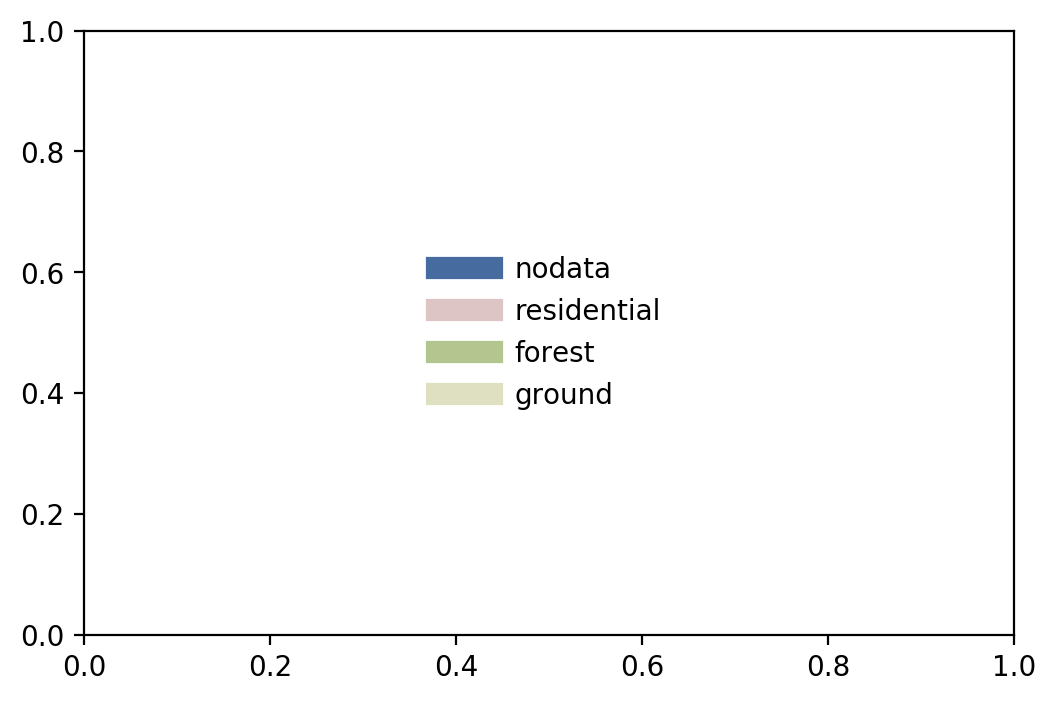

In [ ]:
# build custom matplotlib colormap
custom_colors_list = list()
for idx, class_val in enumerate(custom_colors.keys()):
  red, green, blue = custom_colors[class_val]

  color_vec = np.array([red/255, green/255, blue/255])
  custom_colors_list.append(color_vec)

custom_colors_list.append(np.array([0, 0, 0]))

custom_colors_list = np.stack(custom_colors_list)
cmap = matplotlib.colors.ListedColormap(colors=custom_colors_list, N=len(custom_colors_list)+1)

bounds = list(range(len(custom_colors_list)))
norm = matplotlib.colors.BoundaryNorm(bounds, len(custom_colors_list))

custom_legend_list = list()
for lidx in custom_colors.keys():
  label1 = matplotlib.lines.Line2D([0], [0], color=cmap(lidx), lw = 8, label = custom_classes[lidx])
  custom_legend_list.append(label1)

fig, ax = plt.subplots(dpi=200)
ax.legend(handles=custom_legend_list, loc='center', ncol=1, frameon=False)

In [ ]:
# Creating masks for groupings
residential_mask = image.eq(21).bitwiseOr(image.eq(22)).bitwiseOr(image.eq(23)).bitwiseOr(image.eq(24)).select(['landcover'])  #mask for residental
forest_mask = image.eq(41).bitwiseOr(image.eq(42)).bitwiseOr(image.eq(43)).select(['landcover'])                               #mask for forest
ground_mask = image.eq(52).bitwiseOr(image.eq(71)).bitwiseOr(image.eq(81)).bitwiseOr(image.eq(82)).select(['landcover'])       #mask for wild, ground plants

Map5 = geemap.Map(center=(lat, lon), zoom=11)
fire_name = major_fires['name'][0]
box = major_fires['bounding_box'][0]

Map5.addLayer(image.mask(residential_mask), residential_vis, fire_name + ' residential_vis')
Map5.addLayer(image.mask(forest_mask), forest_vis, fire_name + ' forest_vis')
Map5.addLayer(image.mask(ground_mask).clip(major_fires['bounding_box'][0]), ground_vis, fire_name + ' ground_vis')

ds_forest_area = []

ds_ground_area = []

fires = [tubbs_fire, nuns_fire, pocket_fire]

# Adding the severity layers
for fire in range(len(major_fires)):
  box = major_fires['bounding_box'][fire]
  fire_name = major_fires['name'][fire]
  Map5.addLayer(dNBR.mask(high_severity_mask), nbr_high_severity_vis, fire_name + " dnbr - high severity")
  Map5.addLayer(dNBR.mask(moderate_severity_mask), nbr_moderate_severity_vis, fire_name + " dnbr - moderate severity")
  Map5.addLayer(dNBR.mask(low_severity_mask), nbr_small_severity_vis, fire_name + " dnbr - small severity")

  img_forest = image.pixelArea().mask(forest_mask).mask(damage_dNBR_mask).clip(box)
  img_ground = image.pixelArea().mask(ground_mask).mask(damage_dNBR_mask).clip(box)

  area2 = img_forest.reduceRegion(reducer = ee.Reducer.sum(),geometry = box, crs =  'EPSG:4326', scale = 100)
  area = ee.Number(area2.get('area')).getInfo()
  acres = area*0.0002471


  print(area)

  ds_forest_area.append([major_fires['name'][fire],area, acres])

  area2 = img_ground.reduceRegion(reducer = ee.Reducer.sum(),geometry = box, crs =  'EPSG:4326', scale = 100)
  area = ee.Number(area2.get('area')).getInfo()
  acres = area*0.0002471
  print(area)

  ds_ground_area.append([major_fires['name'][fire],area, acres])


Map5.add_legend(title = "LEGEND", legend_dict= {"HIGH SEVERITY":"ff0000", "MODERATE SEVERITY":"ffa500", "LOW SEVERITY":"FFFF00", "GROUND PLANTS":'BFF4BE', "FOREST" : "154734", "RESIDENTIAL" :"faebd7"})


fc = ee.FeatureCollection([ee.Feature(major_fires['bounding_box'][0], {'name' : major_fires['name'][0], 'shown' : 'true'}), ee.Feature(major_fires['bounding_box'][1], {'name' : major_fires['name'][1], 'shown' : 'true'}),ee.Feature(major_fires['bounding_box'][2], {'name' : major_fires['name'][2], 'shown' : 'true'})])
Map5.addLayer(fc, {'color' : 'grey'}, "fire_names")


72506543.69549629
37525634.715065874
125198317.9100126
138417940.4912855
18855085.855646838
27680878.267156884


In [ ]:
Map5

In [ ]:
ds_ground_area = np.array(ds_ground_area) 


ground_area_df = pd.DataFrame({'fire_name':ds_ground_area[:,0]})
ground_area_df['estimated area burned (m^2)'] = ds_ground_area[:,1]
ground_area_df['estimated area burned (acres)'] = ds_ground_area[:,2]
ground_area_df['estimated area burned (acres)'] = ground_area_df['estimated area burned (acres)'].astype('float64')
ground_area_df['estimated area burned (m^2)'] = ground_area_df['estimated area burned (m^2)'].astype('float64')



ds_forest_area = np.array(ds_forest_area) 

forest_area_df = pd.DataFrame({'fire_name':ds_forest_area[:,0]})
forest_area_df['estimated area burned (m^2)'] = ds_forest_area[:,1]
forest_area_df['estimated area burned (acres)'] = ds_forest_area[:,2]
forest_area_df['estimated area burned (acres)'] = forest_area_df['estimated area burned (acres)'].astype('float64')
forest_area_df['estimated area burned (m^2)'] = forest_area_df['estimated area burned (m^2)'].astype('float64')


In [ ]:
ground_area_df

,fire_name,estimated area burned (m^2),estimated area burned (acres)
0,TUBBS,3.752563e+07,9272.584338
1,NUNS,1.384179e+08,34203.073095
2,POCKET,2.768088e+07,6839.945020


In [ ]:
forest_area_df

,fire_name,estimated area burned (m^2),estimated area burned (acres)
0,TUBBS,7.250654e+07,17916.366947
1,NUNS,1.251983e+08,30936.504356
2,POCKET,1.885509e+07,4659.091715


### Mean above ground biomass (Mg ha^-1)

Source: Wenli Huang, Anu Swatantran, Laura Duncanson, Kristofer Johnson, Dana
Watkinson, Katelyn Dolan, Jarlath O'Neil-Dunne, George Hurtt & Ralph Dubayah (2017): Countyscale
biomass map comparison: a case study for Sonoma, California, Carbon Management, DOI:
10.1080/17583004.2017.1396840

|Product |Forest |Non-forest| All   |
|--------|-------|----------|-------|
|CMS_RF  | 199.1 | 41.4     | 123.0 |
|NBCD    | 192.5 | 15.3     | 107.0 |
|Saatchi | 213.0 | 16.7     | 118.2 |
|FIA_PLOT| 192.4 | 20.6     | 109.4 |

In [ ]:
def carbonEmissions(forestArea, groundArea, resolution, fc=0.5, beta=0.8):
  '''
  Using biomass density data from the Forest Inventory Analysis plots (FIA_PLOTS).
  area in m^2
  resolution in meters
  '''
  forestDensity = 192.4 #/Mg/ha
  groundDensity = 20.6  #Mg/ha
  pixelArea = resolution*resolution/10000 #converting m2 to ha
  carbonFlux = pixelArea*fc*beta*(forestDensity*forestArea + groundDensity*groundArea)
  return carbonFlux

In [ ]:
forestAreas = forest_area_df['estimated area burned (m^2)']/10000 #converting m2 to ha
forestAreas.name=''

groundAreas = ground_area_df['estimated area burned (m^2)']/10000 #converting m2 to ha
groundAreas.name=''

carbonFlux = carbonEmissions(forestArea=forestAreas, groundArea=groundAreas, resolution=30)

In [ ]:
carbonFlux #units are tC

0    53003.833496
1    96982.437384
2    15112.600599
Name: , dtype: float64

# Gif-ing

In [ ]:
# Convertingi to gif
from PIL import Image
from IPython.display import Image as Im
import os
import glob
detected_dir = './'
# Create gif from the images
def generate_gif(input_images_dir, dt):
	frames = os.path.join(input_images_dir, '*.png')
	gif_file = os.path.join(input_images_dir, 'out.gif')
	img, *imgs = [Image.open(f) for f in sorted(glob.glob(frames))]
	img.save(fp=gif_file, format='GIF', append_images=imgs,
	         save_all=True, duration=dt, loop=0)
	print(type(img))
generate_gif(detected_dir, dt=1000)
with open('./out.gif','rb') as f:
  display(Im(data=f.read(), format='png'))